In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
if not os.getcwd() == '/NN_project':
    os.chdir('..')

from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import pandas as pd
from datetime import datetime



In [2]:
from src.data.VOC2012.data_preprocess import load_preprocess_save
from src.data.VOC2012.data import classes
#json_file = 'data/preprocessed/VOC2012/annotations.json'
pickle_file = 'data/preprocessed/VOC2012/preprocessed.pkl'
#df = load_preprocess_save(json_file, pickle_file)
df = pd.read_pickle(pickle_file)
df.head()

,folder,filename,object,width,height,depth,object_count,img_id,output,has_person,...,grid_1_3,grid_2_0,grid_2_1,grid_2_2,grid_2_3,grid_3_0,grid_3_1,grid_3_2,grid_3_3,grid_output
0,VOC2012,2007_000027.jpg,"[{'grid_box': (2.0, 1.0), 'class': [14], 'is_o...",486,500,3,1,0,"[[0.53806585, 0.452, 0.3600823, 0.5, 1.0, 0.0,...",True,...,"[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.16115703, 0.808, 0.3600823, 0.5, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
1,VOC2012,2007_000032.jpg,"[{'grid_box': (1.0, 1.0), 'class': [0], 'is_ob...",500,281,3,4,1,"[[0.408, 0.727758, 0.036, 0.17437722, 1.0, 0.0...",True,...,"[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
2,VOC2012,2007_000033.jpg,"[{'grid_box': (2.0, 2.0), 'class': [0], 'is_ob...",500,366,3,3,2,"[[0.0, 0.0, 0.0, 0.0, 0.0]]",False,...,"[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
3,VOC2012,2007_000039.jpg,"[{'grid_box': (2.0, 1.0), 'class': [19], 'is_o...",500,375,3,1,3,"[[0.0, 0.0, 0.0, 0.0, 0.0]]",False,...,"[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
4,VOC2012,2007_000042.jpg,"[{'grid_box': (3.0, 1.0), 'class': [18], 'is_o...",500,335,3,2,4,"[[0.0, 0.0, 0.0, 0.0, 0.0]]",False,...,"[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."


In [3]:
df = df[df['has_person']].reset_index()

In [4]:
df.head()

,index,folder,filename,object,width,height,depth,object_count,img_id,output,...,grid_1_3,grid_2_0,grid_2_1,grid_2_2,grid_2_3,grid_3_0,grid_3_1,grid_3_2,grid_3_3,grid_output
0,0,VOC2012,2007_000027.jpg,"[{'grid_box': (2.0, 1.0), 'class': [14], 'is_o...",486,500,3,1,0,"[[0.53806585, 0.452, 0.3600823, 0.5, 1.0, 0.0,...",...,"[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.16115703, 0.808, 0.3600823, 0.5, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
1,1,VOC2012,2007_000032.jpg,"[{'grid_box': (1.0, 1.0), 'class': [0], 'is_ob...",500,281,3,4,1,"[[0.408, 0.727758, 0.036, 0.17437722, 1.0, 0.0...",...,"[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."
2,10,VOC2012,2007_000129.jpg,"[{'grid_box': (1.0, 2.0), 'class': [1], 'is_ob...",334,500,3,6,10,"[[0.1002994, 0.364, 0.19461077, 0.724, 1.0, 0....",...,"[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.084337346, 0.852, 0.5928144, 0.922, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.5301205, 0.024, 0.24550898, 0.936, 1.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.40361446, 0.45..."
3,11,VOC2012,2007_000170.jpg,"[{'grid_box': (0.0, 1.0), 'class': [4], 'is_ob...",500,375,3,6,11,"[[0.046, 0.396, 0.08, 0.30666667, 1.0, 0.0, 0....",...,"[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.184, 0.5967742..."
4,18,VOC2012,2007_000272.jpg,"[{'grid_box': (1.0, 2.0), 'class': [14], 'is_o...",333,500,3,1,18,"[[0.493994, 0.571, 0.8378378, 0.858, 1.0, 0.0,...",...,"[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0]]]","[[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0..."


In [31]:
from src.models.YOLOv3 import create_model
from src.models.DataGen import DataGenGrid
from src.models.losses import WholeOutputLoss
from config import GRID_SIZE


datagen = DataGenGrid(batch_size=32, input_size=(256,256), validation_split=0)

K.clear_session()
model = create_model(len(classes))

log = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir=os.path.join("logs", log),
        histogram_freq=1,
        profile_batch=0)
]
print('Logs:', log)
losses = [WholeOutputLoss(grid_x=x, grid_y=y, grid_size=GRID_SIZE, negative_box_coef=0.5) for x in range(GRID_SIZE[0]) for y in range(GRID_SIZE[1])]
#sgd= keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
#adam = keras.optimizers.Adam(clipvalue=0.5)
model.compile(loss=losses, optimizer='adam')
# model.fit_generator(datagen.flow_train(df.head(5)), 
#                     epochs=10, 
#                    # validation_data=datagen.flow_val(df.head(1))
#                     callbacks=callbacks
#                    )
model.summary()

Logs: 2019_11_18_22_22_44
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 4640        conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 32) 128         conv2d_1[0][0]                   
____________________________________________________________________

In [32]:
history = model.fit_generator(datagen.flow_train(df.head(1)), 
                    epochs=10, 
                   # validation_data=datagen.flow_val(df.head(1))
                    verbose=0,
                    callbacks=callbacks
                   );

Found 1 validated image filenames.


Found 1 validated image filenames.
2 1 [0.21558586 0.8036495 ] [0.38766232 0.49103957] 0.57102567 1.0


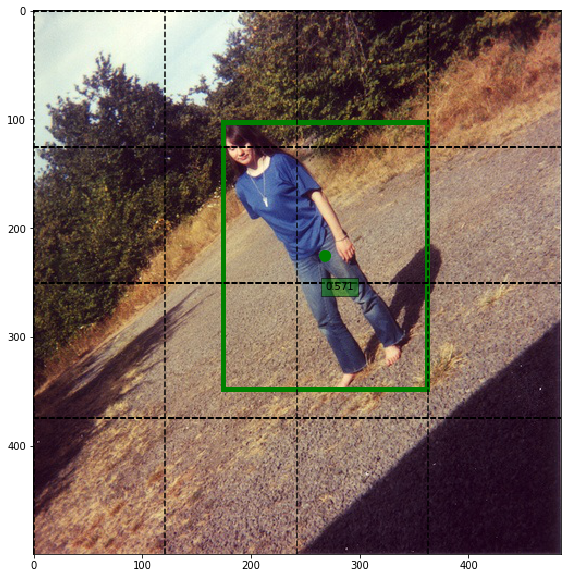

In [34]:
from src.data.VOC2012.plot import plot_grid
num_predictions = 1
pred = model.predict_generator(datagen.flow_train(df.head(num_predictions)))
for i in range(num_predictions):
    plot_grid(df, i, np.array(pred)[:,i], plot_ground_truth=False)